In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
# import sklearn

# seaborn.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets, model_selection

# load in the iris dataset
iris_data = datasets.load_iris()

x = iris_data.data
y = iris_data.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, stratify=y)

In [3]:
from sklearn import linear_model

# fit our model and score it on the test set
lr_model = linear_model.LogisticRegression(class_weight="balanced", solver='lbfgs', multi_class='auto')
lr_model.fit(x_train, y_train)

print(f"""
train score: {lr_model.score(x_train, y_train):%}
test score: {lr_model.score(x_test, y_test):%}
""")


train score: 98.214286%
test score: 94.736842%



In [4]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# let's store some of these handy bits of data within the model

lr_model.feature_names = iris_data.feature_names
lr_model.target_names = iris_data.target_names

In [7]:
def plot_ovr_coefs(model):
    """Helper to plot coefficients of a ovr model like Logistic Regression"""
    n_models, n_coef = model.coef_.shape

    lod = []
    for i in range(n_models):
        for j in range(n_coef):
            lod.append({
                "OVR Model": f"{model.target_names[i]} vs rest",
                "Coefficient Name": f"{model.feature_names[j]}",
                "Coefficient Value": model.coef_[i,j]
            })
    coef_df = pd.DataFrame(lod)


    sns.barplot(y="Coefficient Name", x="Coefficient Value", hue="OVR Model", orient="h", data=coef_df)

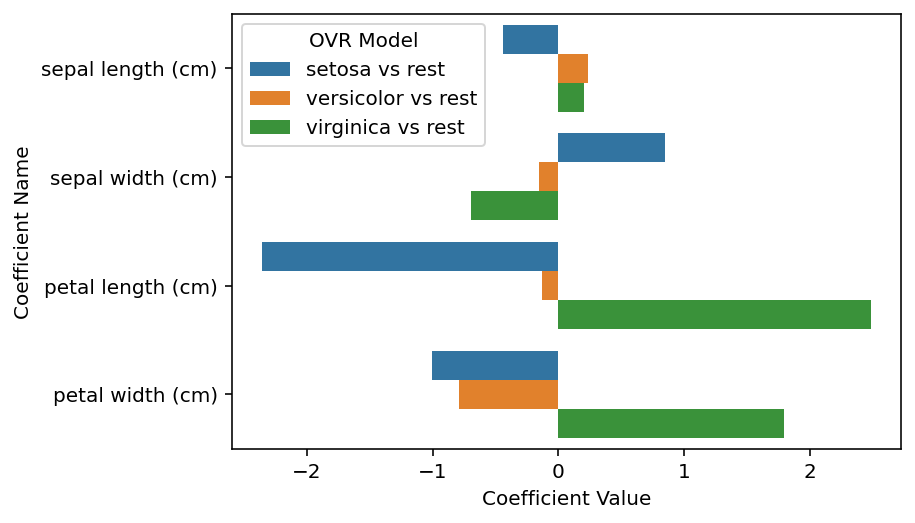

In [8]:
# let's plot the coefficients to demonstrate that the model and what it has learned are preserved through pickling

plot_ovr_coefs(lr_model)

In [10]:
!mkdir -p predictor

In [13]:
import pickle

with open("predictor/lr.pkl", "wb") as f:
    pickle.dump(lr_model, f)

I'm going to test out our pickling ability by deleting the model, showing that the above figure doesn't work, and then loading the model from pickle and showing that it does

In [14]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 94DB-0995

 Directory of C:\Users\Projects\Kaplan\NBM_Engineering_Gamma-main\curriculum\flask-web-apps

12/13/2021  02:24 PM    <DIR>          .
12/13/2021  02:24 PM    <DIR>          ..
12/13/2021  11:21 AM    <DIR>          .ipynb_checkpoints
09/01/2021  09:01 PM    <DIR>          additional_resources
09/01/2021  09:01 PM               420 app.py
09/01/2021  09:01 PM             7,495 flask_intro.md
09/01/2021  09:01 PM             1,923 html-lab.md
12/13/2021  02:24 PM    <DIR>          -p
12/13/2021  02:25 PM    <DIR>          predictor
09/01/2021  09:01 PM               554 readme.md
09/01/2021  09:01 PM    <DIR>          solution
09/01/2021  09:01 PM             9,567 train_save_model.ipynb
               5 File(s)         19,959 bytes
               7 Dir(s)  46,703,898,624 bytes free


try uncommenting the lines below

In [ ]:
# del lr_model

# plot_ovr_coefs(lr_model)

In [15]:
with open("predictor/lr.pkl", "rb") as f:
    lr_model2 = pickle.load(f)

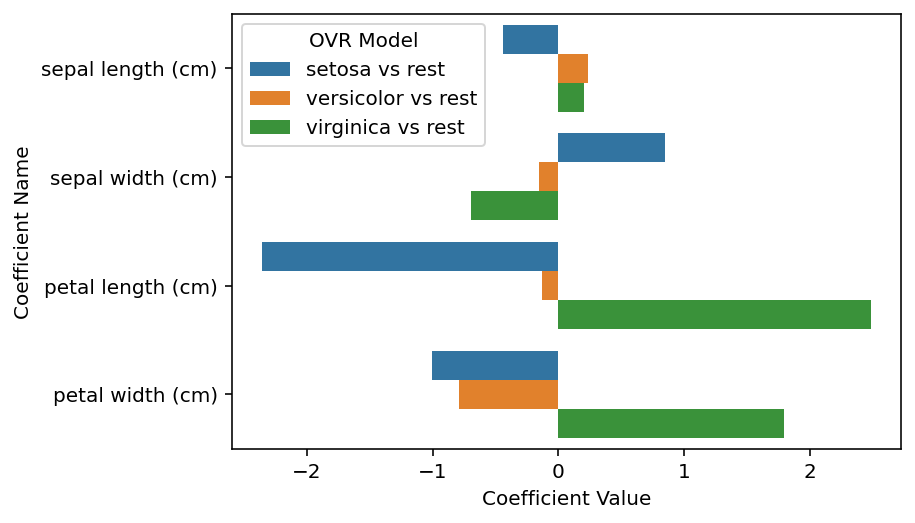

In [16]:
plot_ovr_coefs(lr_model2)

We can also predict on synthetic data

In [17]:
lr_model2.predict([[0,0,0,1]])

array([0])

In [18]:
lr_model2.predict_proba([[0,0,0,1]])

array([[9.98701697e-01, 1.29829967e-03, 3.51887923e-09]])

In [19]:
pred_probs = lr_model2.predict_proba([[0,0,0,1]]).flat

We can find the most likely classes

In [20]:
np.argsort(pred_probs)[::-1]

array([0, 1, 2], dtype=int64)

Finally, we can pair the predicted probabilities with each candidate class

In [21]:
pred_str = ""
for class_i in np.argsort(pred_probs)[::-1]:
    pred_str += f"""
    {lr_model2.target_names[class_i]}: {pred_probs[class_i]:g}
    """
print(pred_str)


    setosa: 0.998702
    
    versicolor: 0.0012983
    
    virginica: 3.51888e-09
    


In [22]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 94DB-0995

 Directory of C:\Users\Projects\Kaplan\NBM_Engineering_Gamma-main\curriculum\flask-web-apps

12/13/2021  02:24 PM    <DIR>          .
12/13/2021  02:24 PM    <DIR>          ..
12/13/2021  11:21 AM    <DIR>          .ipynb_checkpoints
09/01/2021  09:01 PM    <DIR>          additional_resources
09/01/2021  09:01 PM               420 app.py
09/01/2021  09:01 PM             7,495 flask_intro.md
09/01/2021  09:01 PM             1,923 html-lab.md
12/13/2021  02:24 PM    <DIR>          -p
12/13/2021  02:25 PM    <DIR>          predictor
09/01/2021  09:01 PM               554 readme.md
09/01/2021  09:01 PM    <DIR>          solution
09/01/2021  09:01 PM             9,567 train_save_model.ipynb
               5 File(s)         19,959 bytes
               7 Dir(s)  46,703,726,592 bytes free


In [23]:
cd predictor


C:\Users\Projects\Kaplan\NBM_Engineering_Gamma-main\curriculum\flask-web-apps\predictor


In [25]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 94DB-0995

 Directory of C:\Users\Projects\Kaplan\NBM_Engineering_Gamma-main\curriculum\flask-web-apps\predictor

12/13/2021  02:25 PM    <DIR>          .
12/13/2021  02:25 PM    <DIR>          ..
12/13/2021  02:25 PM             1,085 lr.pkl
               1 File(s)          1,085 bytes
               2 Dir(s)  46,703,357,952 bytes free
